In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set style for better visuals
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10
%matplotlib inline

In [8]:
# LOAD AND EXPLORE DATA
df = pd.read_csv('FC26_20250921.csv')
print(f"Dataset: {df.shape[0]} players, {df.shape[1]} features\n")

# QUICK OVERVIEW
# Display first few rows
df.head()



Dataset: 18405 players, 110 features



,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,252371,/player/252371/jude-bellingham/260004/,26,4,2025-09-19,J. Bellingham,Jude Victor William Bellingham,"CAM, CM",90,94,...,85+3,85+3,83+3,82+3,81+3,81+3,81+3,82+3,18+3,https://cdn.sofifa.net/players/252/371/26_120.png
1,239053,/player/239053/federico-valverde/260004/,26,4,2025-09-19,F. Valverde,Federico Santiago Valverde Dipetta,"CM, CDM, RB",89,90,...,87+3,87+3,86+3,86+3,83+3,83+3,83+3,86+3,18+3,https://cdn.sofifa.net/players/239/053/26_120.png
2,212622,/player/212622/joshua-kimmich/260004/,26,4,2025-09-19,J. Kimmich,Joshua Walter Kimmich,"CDM, RB, CM",89,89,...,87+2,87+2,86+3,85+3,82+3,82+3,82+3,85+3,21+3,https://cdn.sofifa.net/players/212/622/26_120.png
3,235212,/player/235212/achraf-hakimi/260004/,26,4,2025-09-19,A. Hakimi,Achraf Hakimi Mouhأشرف حكيمي,"RB, RM",89,90,...,83+3,83+3,86+3,86+3,81+3,81+3,81+3,86+3,17+3,https://cdn.sofifa.net/players/235/212/26_120.png
4,224232,/player/224232/nicolo-barella/260004/,26,4,2025-09-19,N. Barella,Nicolò Barella,CM,87,87,...,85+2,85+2,84+3,83+3,80+3,80+3,80+3,83+3,19+3,https://cdn.sofifa.net/players/224/232/26_120.png


In [16]:
# Display summary statistics
df.describe()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,18405.000000,18405.0,18405.0,18405.000000,18405.000000,1.840500e+04,18405.000000,18405.000000,18405.000000,18405.000000,...,18405.000000,18405.000000,18405.000000,18405.000000,18405.000000,18405.000000,18405.000000,18405.000000,18405.000000,2062.000000
mean,207378.375822,26.0,4.0,65.766965,71.165173,2.931633e+06,10096.055420,25.222548,182.001358,75.141755,...,57.747786,46.253572,48.435914,46.248737,16.285683,16.082749,15.998642,16.139147,16.343928,34.489816
std,73761.964821,0.0,0.0,6.980628,6.403862,7.947787e+06,20082.981891,4.773553,6.891484,6.891777,...,12.257447,20.723894,21.038765,20.575523,17.589875,17.002686,16.770157,17.162219,17.859712,10.552502
min,19541.000000,26.0,4.0,47.000000,49.000000,0.000000e+00,0.000000,16.000000,155.000000,47.000000,...,15.000000,5.000000,7.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,195859.000000,26.0,4.0,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,177.000000,70.000000,...,50.000000,28.000000,29.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000,26.000000
50%,237681.000000,26.0,4.0,66.000000,71.000000,1.000000e+06,4000.000000,25.000000,182.000000,75.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,33.000000
75%,260601.000000,26.0,4.0,70.000000,75.000000,2.100000e+06,10000.000000,29.000000,187.000000,80.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,43.000000
max,280142.000000,26.0,4.0,91.000000,95.000000,1.745000e+08,610000.000000,44.000000,210.000000,105.000000,...,93.000000,91.000000,91.000000,89.000000,90.000000,90.000000,91.000000,90.000000,90.000000,65.000000


In [17]:

# Display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18405 entries, 0 to 18404
Columns: 110 entries, player_id to player_face_url
dtypes: float64(16), int64(48), object(46)
memory usage: 15.4+ MB


In [26]:

# Check for missing values
ms = df.isnull().sum()
print(ms[ms > 0])
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_pct


league_id                            89
league_name                          89
league_level                         89
club_team_id                         89
club_name                            89
club_position                        89
club_jersey_number                   89
club_loaned_from                  17080
club_joined_date                   1414
club_contract_valid_until_year       89
nation_team_id                    17677
nation_position                   17677
nation_jersey_number              17677
work_rate                         18405
release_clause_eur                 1434
player_tags                       17455
player_traits                     10789
pace                               2062
shooting                           2062
passing                            2062
dribbling                          2062
defending                          2062
physic                             2062
goalkeeping_speed                 16343
dtype: int64


work_rate               100.000000
nation_position          96.044553
nation_team_id           96.044553
nation_jersey_number     96.044553
player_tags              94.838359
                           ...    
cb                        0.000000
rcb                       0.000000
rb                        0.000000
gk                        0.000000
player_face_url           0.000000
Length: 110, dtype: float64

In [28]:
#CLEAN DATA
df_backup = df.copy()
# Drop columns with >50% missing data
high_missing = missing_pct[missing_pct > 50].index
df = df.drop(columns=high_missing)

# Fill missing values
# Fill numeric columns with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
# Fill categorical columns with 'Unknown'
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

In [30]:
# CREATING DERIVED METRICS
# Age categories
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 21, 25, 30, 35, 100],
                         labels=['U21', '22-25', '26-30', '31-35', '35+'])

# Potential growth
df['potential_growth'] = df['potential'] - df['overall']

# Skills average
skill_cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
df['avg_skills'] = df[skill_cols].mean(axis=1)

# Extract main position
df['main_position'] = df['player_positions'].str.split(',').str[0]

# Position type
position_groups = {
    'GK': 'Goalkeeper',
    'CB': 'Defender', 'LB': 'Defender', 'RB': 'Defender', 'LWB': 'Defender', 'RWB': 'Defender',
    'CDM': 'Midfielder', 'CM': 'Midfielder', 'LM': 'Midfielder', 'RM': 'Midfielder', 'CAM': 'Midfielder',
    'LW': 'Forward', 'RW': 'Forward', 'ST': 'Forward', 'CF': 'Forward'
}
df['position_type'] = df['main_position'].map(position_groups).fillna('Other')

In [43]:
# STATISTICS
# Overall statistics
print(f" Overal Rating Statistics:")
print(f"Mean: {df['overall'].mean():.1f}")
print(f"Median: {df['overall'].median():.0f}")
print(f"Std Dev: {df['overall'].std():.1f}")

print(f"\n Market Value Statistics:")
print(f"Mean: €{df['value_eur'].mean():,.0f}")
print(f"Median: €{df['value_eur'].median():,.0f}")
print(f"Total: €{df['value_eur'].sum():,.0f}")

print(f"\n Age Statistics:")
print(f"Mean: {df['age'].mean():.1f} years")
print(f"Youngest: {df['age'].min()} years")
print(f"Oldest: {df['age'].max()} years")

# Position distribution
print(f"\n Plaers by Position Type:")
position_dist = df['position_type'].value_counts()
for pos, count in position_dist.items():
    print(f"{pos}: {count:,} ({count/len(df)*100:.1f}%)")

# Top leagues
print(f"\n Top 5 Leagues by Average Player Value:")
league_stats = df.groupby('league_name')['value_eur'].agg(['mean', 'count'])
top_leagues = league_stats[league_stats['count'] > 50].nlargest(5, 'mean')
for league, row in top_leagues.iterrows():
    print(f"{league}: €{row['mean']:,.0f} ({int(row['count'])} players)")

# Top clubs
print(f"\n Top 5 Clubs by Average Overall Rating:")
club_stats = df.groupby('club_name')['overall'].agg(['mean', 'count'])
top_clubs = club_stats[club_stats['count'] > 15].nlargest(5, 'mean')
for club, row in top_clubs.iterrows():
    print(f"{club}: {row['mean']:.1f} ({int(row['count'])} players)")

 Overal Rating Statistics:
Mean: 65.8
Median: 66
Std Dev: 7.0

 Market Value Statistics:
Mean: €2,931,633
Median: €1,000,000
Total: €53,956,711,956

 Age Statistics:
Mean: 25.2 years
Youngest: 16 years
Oldest: 44 years

 Plaers by Position Type:
Midfielder: 6,864 (37.3%)
Defender: 6,116 (33.2%)
Forward: 3,363 (18.3%)
Goalkeeper: 2,062 (11.2%)

 Top 5 Leagues by Average Player Value:
Premier League: €16,281,502 (609 players)
La Liga: €12,478,764 (554 players)
Serie A: €7,764,709 (687 players)
Ligue 1: €7,525,369 (488 players)
Bundesliga: €5,819,925 (866 players)

 Top 5 Clubs by Average Overall Rating:
Arsenal: 82.6 (24 players)
Manchester City: 81.0 (26 players)
Paris Saint-Germain: 80.8 (23 players)
Atlético Madrid: 80.2 (25 players)
Inter: 80.2 (25 players)


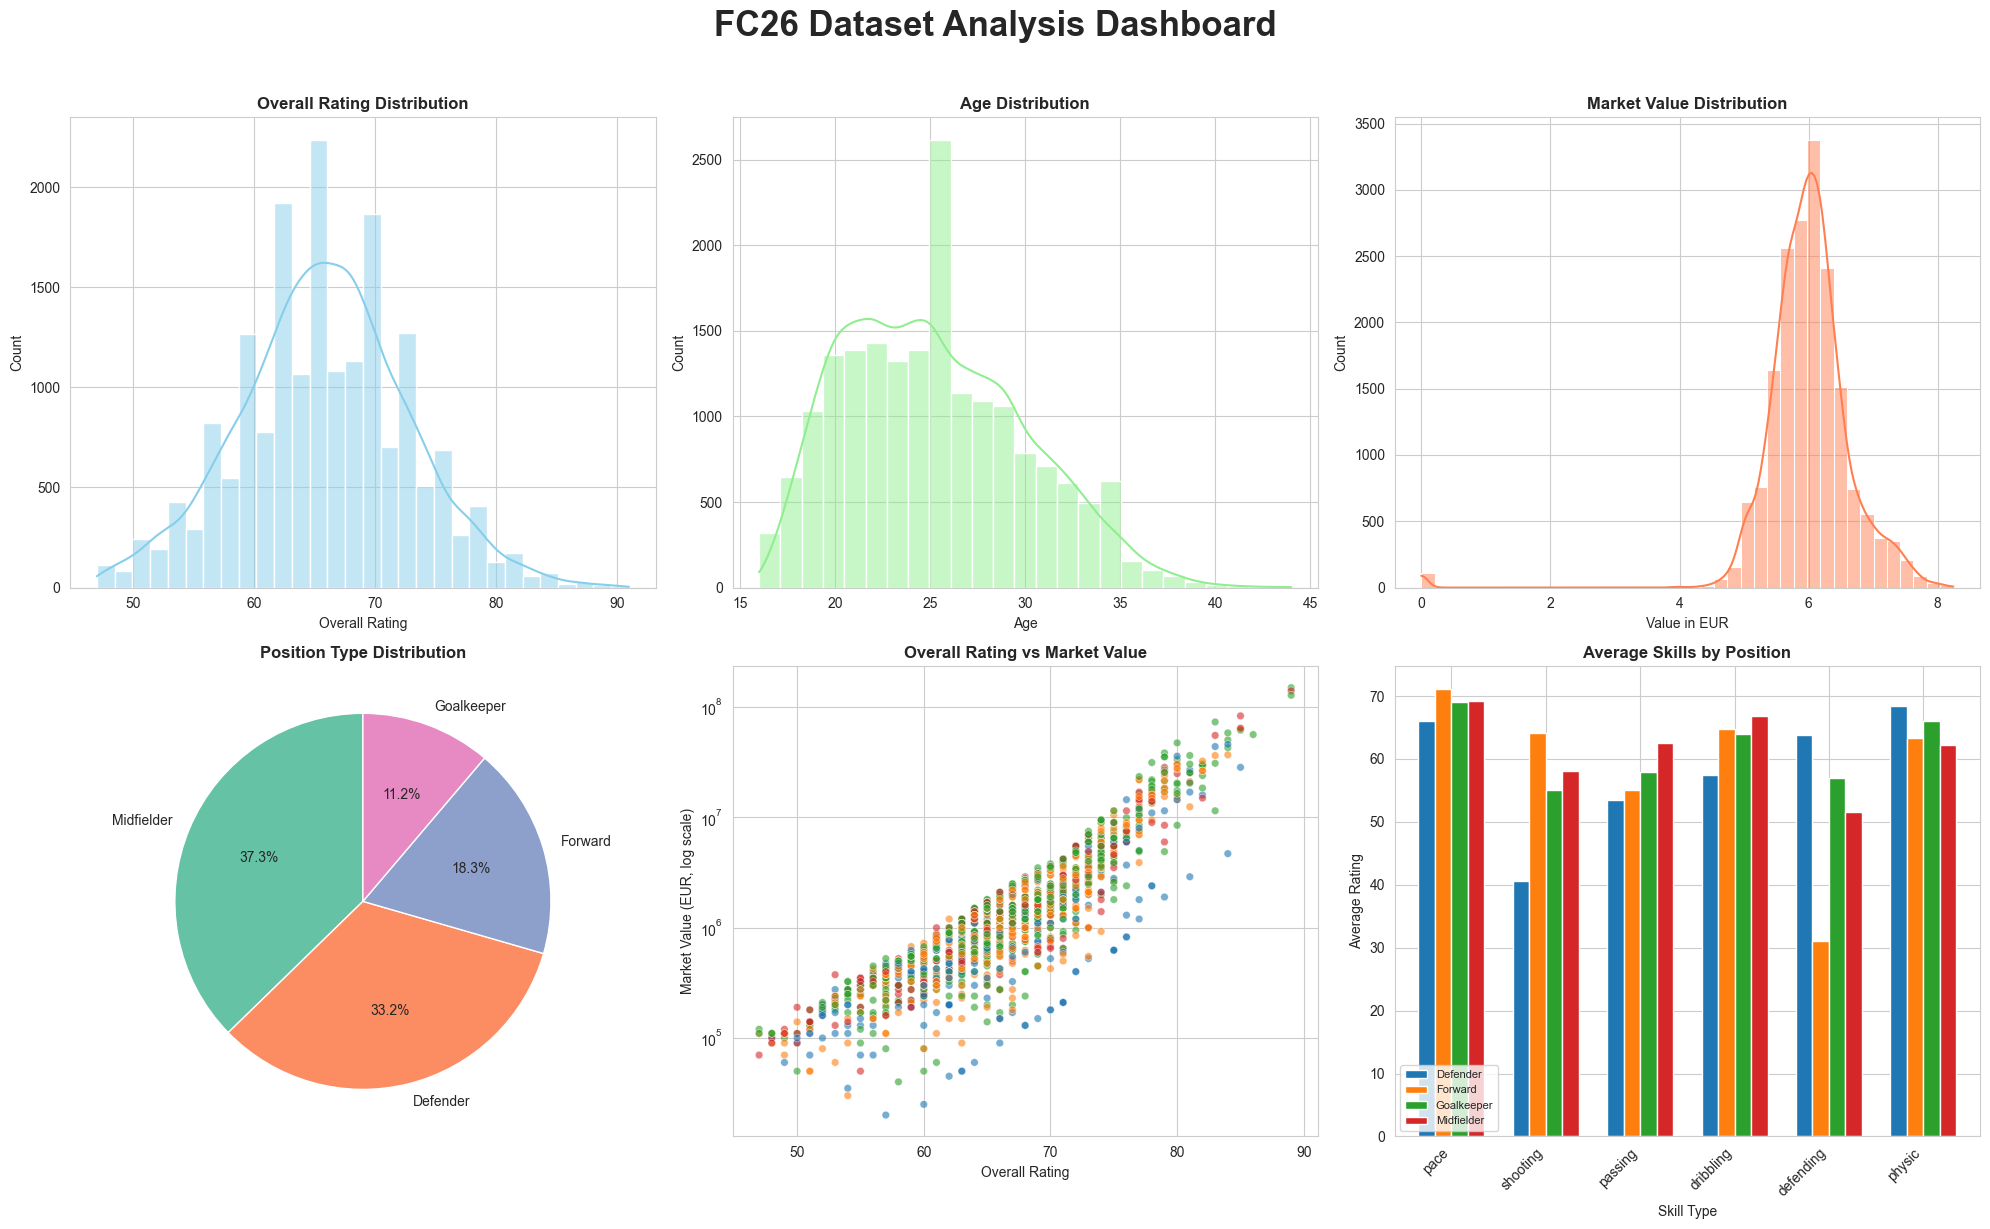

In [107]:
# VISUALIZATIONS
# Create main figure with subplots
fig = plt.figure(figsize=(20, 12))
fig.suptitle('FC26 Dataset Analysis Dashboard', fontsize=25, fontweight='bold', y=1.02)

# 1. Overall Rating Distribution
ax1 = plt.subplot(2, 3, 1)
sns.histplot(df['overall'], bins=30, kde=True, color='skyblue', ax=ax1)
ax1.set_title('Overall Rating Distribution', fontweight='bold')
ax1.set_xlabel('Overall Rating')
ax1.set_ylabel('Count')

# 2. Age Distribution
ax2 = plt.subplot(2, 3, 2)
sns.histplot(df['age'], bins=25, kde=True, color='lightgreen', ax=ax2)
ax2.set_title('Age Distribution', fontweight='bold')
ax2.set_xlabel('Age')
ax2.set_ylabel('Count')

# 3. Value Distribution (Log scale)
ax4 = plt.subplot(2, 3, 3)
value_log = np.log10(df['value_eur'] + 1)
sns.histplot(value_log, bins=40, kde=True, color='coral', ax=ax4)
ax4.set_title('Market Value Distribution', fontweight='bold')
ax4.set_xlabel('Value in EUR')
ax4.set_ylabel('Count')

# 4. Position Distribution (Pie)
ax3 = plt.subplot(2, 3, 4)
position_counts = df['position_type'].value_counts()
colors = sns.color_palette('Set2', len(position_counts))
ax3.pie(position_counts.values, labels=position_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors)
ax3.set_title('Position Type Distribution', fontweight='bold')

# 5. Overall vs Value
ax5 = plt.subplot(2, 3, 5)
sample = df.sample(min(2000, len(df)))
sns.scatterplot(data=sample, x='overall', y='value_eur', hue='position_type',
                alpha=0.6, s=30, ax=ax5, legend=False)
ax5.set_yscale('log')
ax5.set_title('Overall Rating vs Market Value', fontweight='bold')
ax5.set_xlabel('Overall Rating')
ax5.set_ylabel('Market Value (EUR, log scale)')

# 6. Average Skills by Position
ax6 = plt.subplot(2, 3, 6)
avg_skills_pos = df.groupby('position_type')[skill_cols].mean()
avg_skills_pos.T.plot(kind='bar', ax=ax6, width=0.7)
ax6.set_title('Average Skills by Position', fontweight='bold')
ax6.set_xlabel('Skill Type')
ax6.set_ylabel('Average Rating')
ax6.legend(loc='lower left', fontsize=8)
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

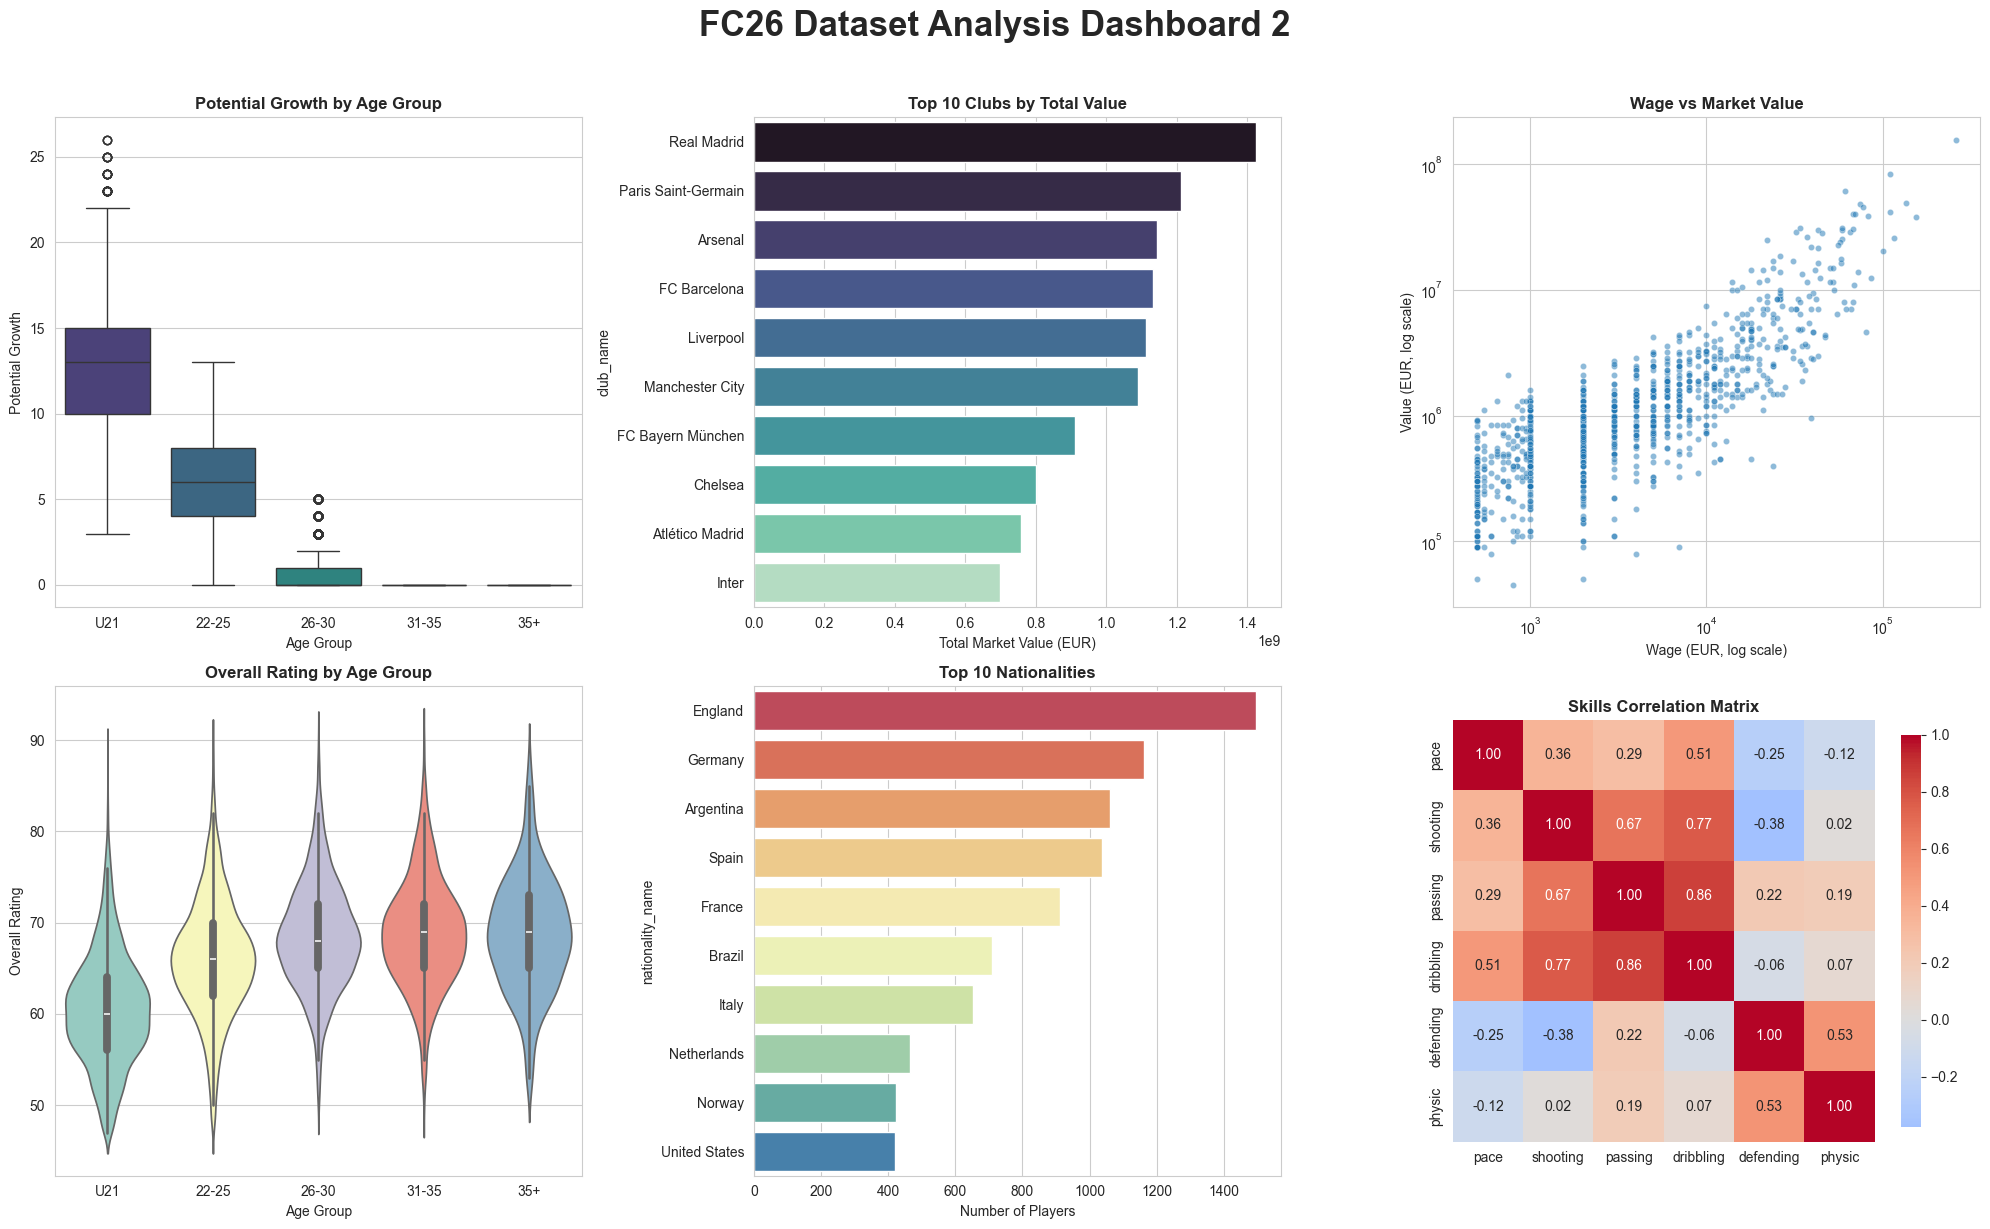

In [106]:
# Create another figure with subplots just to make the dashboard less crowded and clean
fig = plt.figure(figsize=(20, 12))
fig.suptitle('FC26 Dataset Analysis Dashboard 2', fontsize=25, fontweight='bold', y=1.02)

# 7. Age vs Potential Growth
ax7 = plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='age_group', y='potential_growth', palette='viridis', ax=ax7)
ax7.set_title('Potential Growth by Age Group', fontweight='bold')
ax7.set_xlabel('Age Group')
ax7.set_ylabel('Potential Growth')

# 8. Top 10 Clubs by Value
ax8 = plt.subplot(2, 3, 2)
top_clubs_value = df.groupby('club_name')['value_eur'].sum().nlargest(10)
sns.barplot(x=top_clubs_value.values, y=top_clubs_value.index, palette='mako', ax=ax8)
ax8.set_title('Top 10 Clubs by Total Value', fontweight='bold')
ax8.set_xlabel('Total Market Value (EUR)')

# 9. Wage vs Value Relationship
ax9 = plt.subplot(2, 3, 3)
sample2 = df.sample(min(1000, len(df)))
sns.scatterplot(data=sample2, x='wage_eur', y='value_eur', alpha=0.5, s=20, ax=ax9)
ax9.set_xscale('log')
ax9.set_yscale('log')
ax9.set_title('Wage vs Market Value', fontweight='bold')
ax9.set_xlabel('Wage (EUR, log scale)')
ax9.set_ylabel('Value (EUR, log scale)')

# 10. Overall Rating by Age Group
ax10 = plt.subplot(2, 3, 4)
sns.violinplot(data=df, x='age_group', y='overall', palette='Set3', ax=ax10)
ax10.set_title('Overall Rating by Age Group', fontweight='bold')
ax10.set_xlabel('Age Group')
ax10.set_ylabel('Overall Rating')

# 11. Top Nationalities
ax11 = plt.subplot(2, 3, 5)
top_nations = df['nationality_name'].value_counts().head(10)
sns.barplot(x=top_nations.values, y=top_nations.index, palette='Spectral', ax=ax11)
ax11.set_title('Top 10 Nationalities', fontweight='bold')
ax11.set_xlabel('Number of Players')

# 12. Skills Correlation Heatmap
ax12 = plt.subplot(2, 3, 6)
skills_corr = df[skill_cols].corr()
sns.heatmap(skills_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, ax=ax12, cbar_kws={'shrink': 0.8})
ax12.set_title('Skills Correlation Matrix', fontweight='bold')

plt.tight_layout()
plt.show()